# Predicción y caracterización de residuos

In [262]:
from utils import func_tools
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
importlib.reload(func_tools);

### Cargar los datos e imputar elementos faltantes

In [211]:
estratificacion = pd.read_csv('estratificacion.csv',delimiter=',', index_col='ID')
estratificacion = estratificacion.fillna(0)
data_csv_zona = pd.read_csv('residuosrecogidos_zona.csv', delimiter=',')
caracterizacion = pd.read_csv('caracterizacion.csv', delimiter=',')
data_csv_localidad = pd.read_csv('residuosrecogidos_localidad.csv', delimiter=',')
data_csv_zona = func_tools.fillna_col_anterior(data_csv_zona)
data_csv_localidad = func_tools.fillna_2013(data_csv_localidad, estratificacion, data_csv_zona )

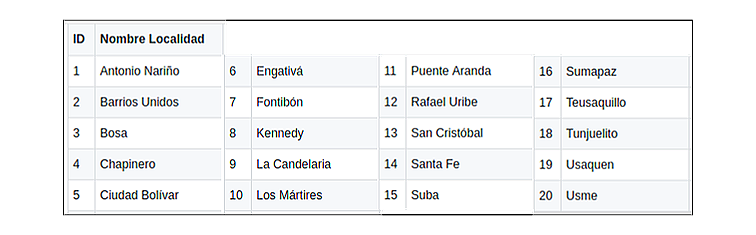

In [275]:
from IPython.display import Image
Image("ids.png")

### Definir parámetros y modelo

In [3]:
parametros = func_tools.iniciar()

Inicio ....
Modelo a entrenar para zonas o localidades? = localidades
Tamaño de la ventana para suavizar las series entre 1 - 4 
Tamaño de la ventana para el suavizado de las series? = 1
Modelos disponibles SVR y LSTM (con pasos de tiempo)
Cuál modelo quiere entrenar? = SVR
Número de prediciones no superior a 24 meses
Número de prediciones a realizar? (en meses) = 24
Número de entrenamientos entre 100 - 250
Número de entrenamientos? = 100
Número de validaciones cruzadas entre 5 - 25 
Cuántas validaciones cruzadas? = 25
OK... Parámetros guardados


In [4]:
parametros

['localidades', '1', 'SVR', 100, 25, '24']

### Generar series

In [5]:
dic_series, series_list = func_tools.generar_series(estratificacion, data_csv_zona, data_csv_localidad, parametros)

### Entrenamiento y predicción

Score entrenamiento R^2:  0.7260994504850138
Support vector (Coeficiente): 0.600


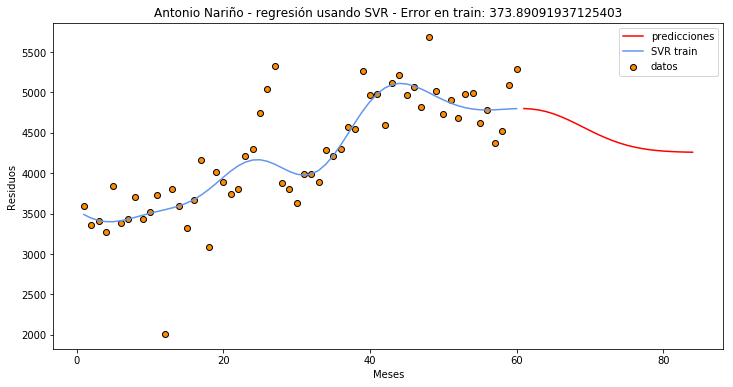

Score entrenamiento R^2:  0.8274045088793721
Support vector (Coeficiente): 0.600


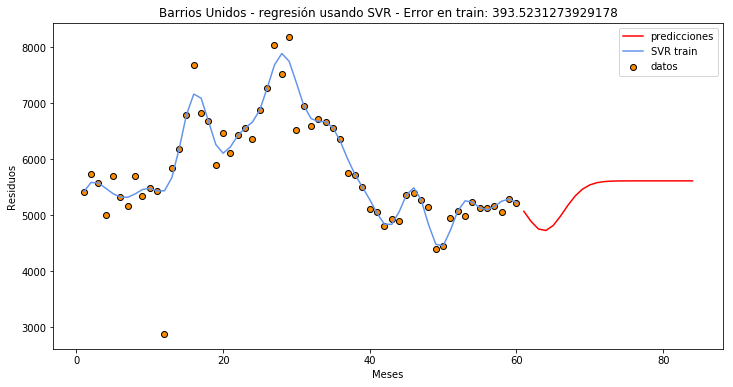

Score entrenamiento R^2:  0.9999999928380358
Support vector (Coeficiente): 0.600


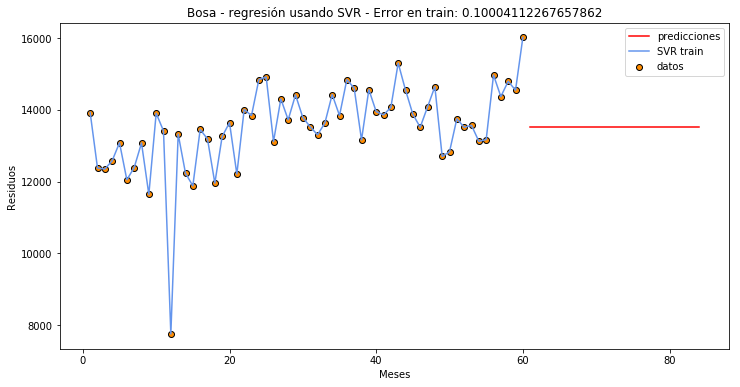

Score entrenamiento R^2:  0.7133984023837807
Support vector (Coeficiente): 0.600


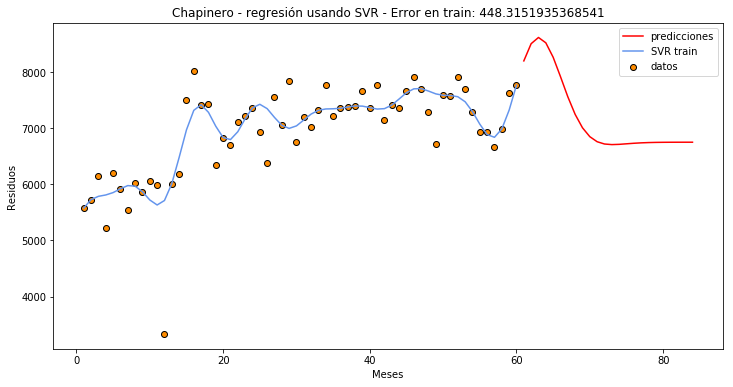

Score entrenamiento R^2:  0.791488039357009
Support vector (Coeficiente): 0.600


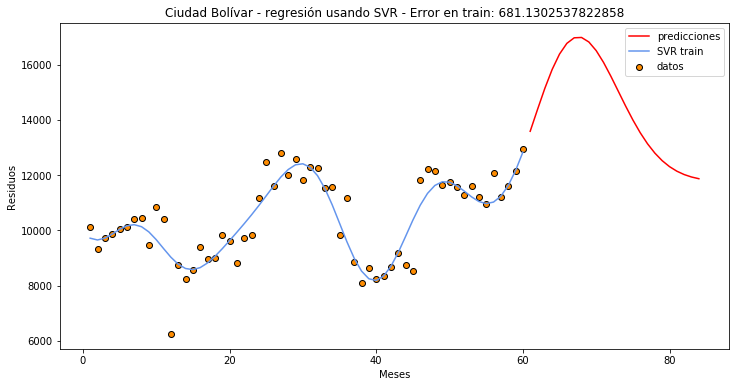

Score entrenamiento R^2:  -0.1012766274096315
Support vector (Coeficiente): 0.600


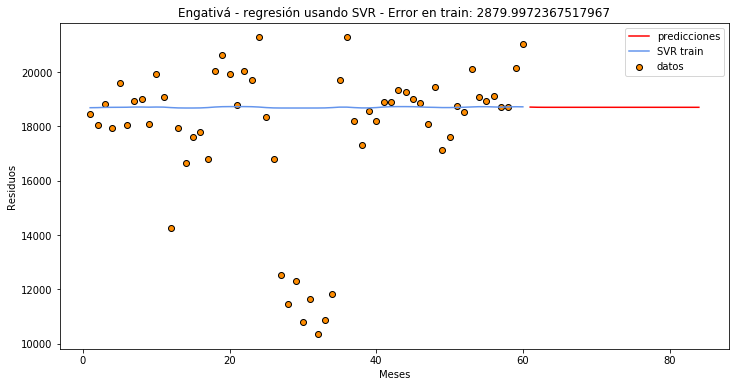

Score entrenamiento R^2:  0.7899823432788797
Support vector (Coeficiente): 0.600


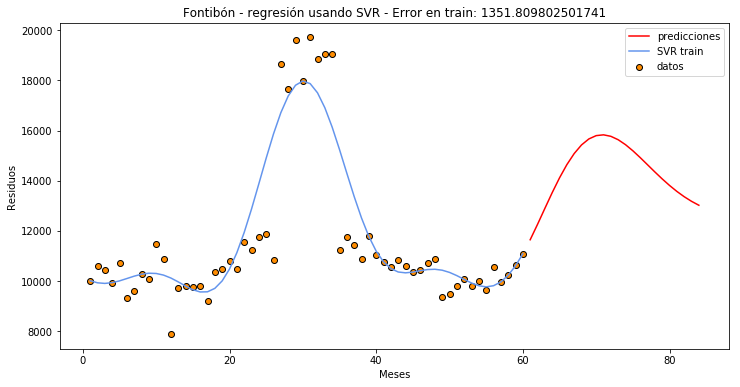

Score entrenamiento R^2:  0.019542579596205645
Support vector (Coeficiente): 0.600


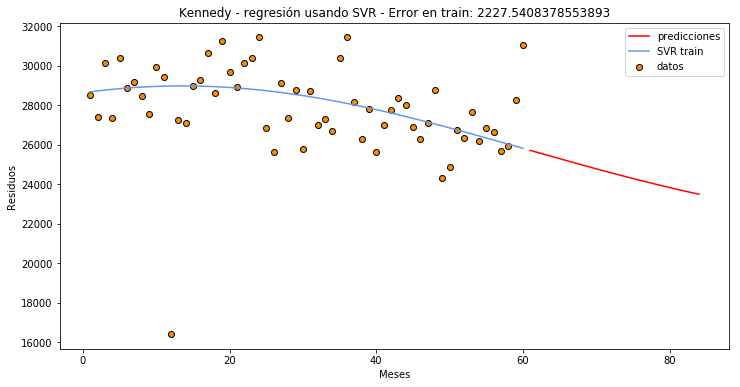

Score entrenamiento R^2:  0.8008856148022139
Support vector (Coeficiente): 0.590


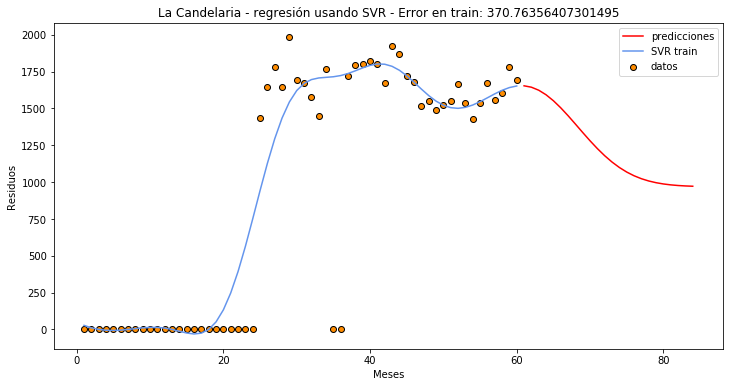

Score entrenamiento R^2:  0.4435438233901817
Support vector (Coeficiente): 0.600


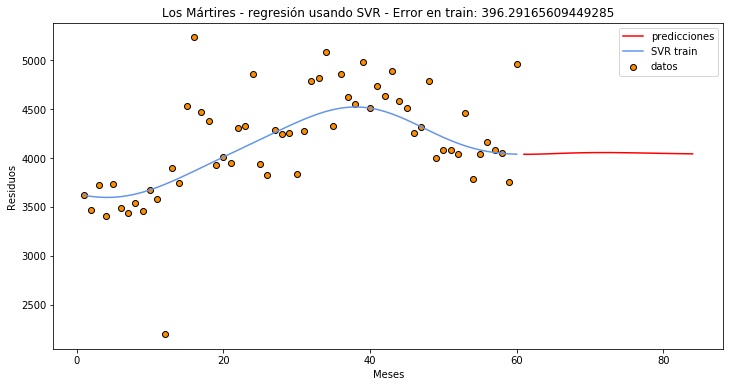

Score entrenamiento R^2:  0.5839787049428252
Support vector (Coeficiente): 0.600


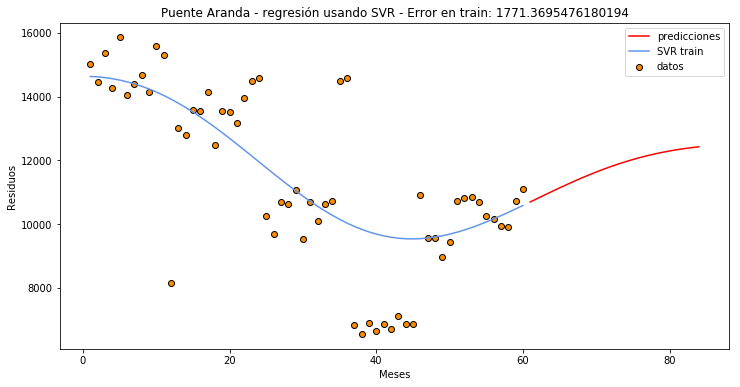

Score entrenamiento R^2:  -0.012030935545649601
Support vector (Coeficiente): 0.600


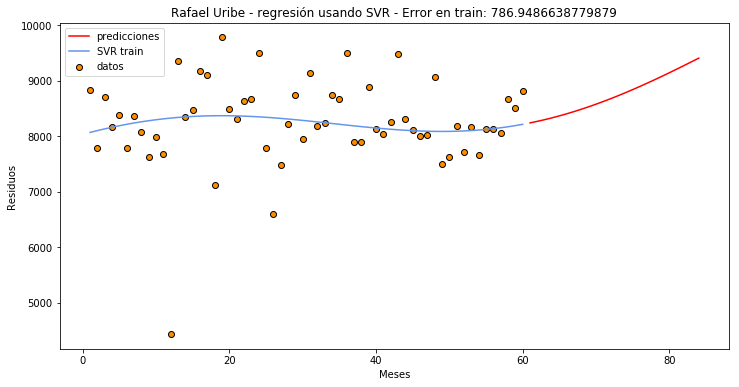

Score entrenamiento R^2:  0.9999999942635642
Support vector (Coeficiente): 0.600


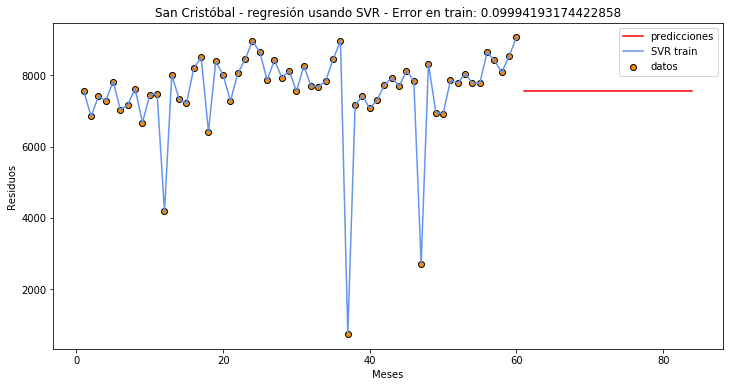

Score entrenamiento R^2:  0.5081330654338059
Support vector (Coeficiente): 0.600


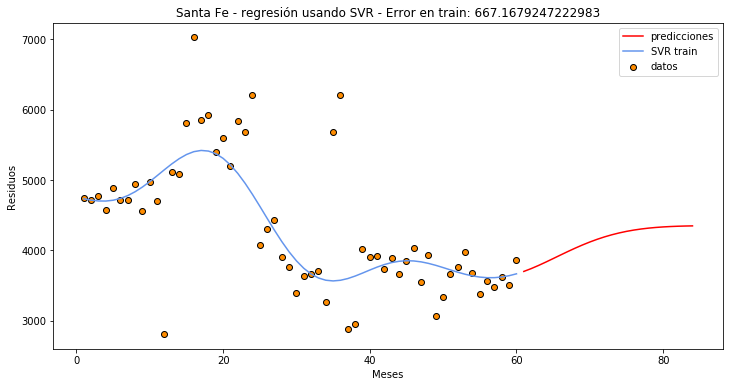

Score entrenamiento R^2:  0.33290084353616056
Support vector (Coeficiente): 0.600


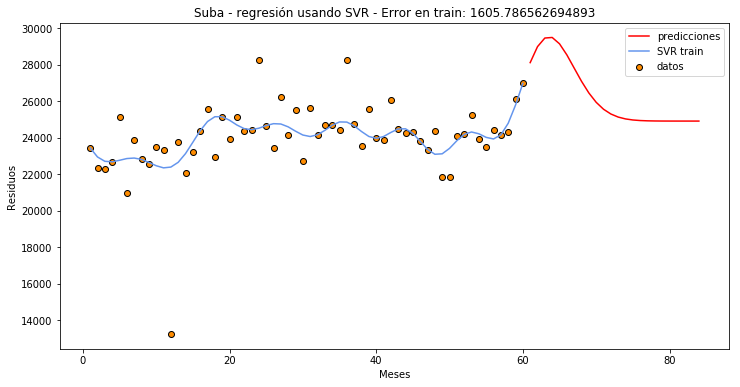

Score entrenamiento R^2:  0.8770187651853936
Support vector (Coeficiente): 0.550


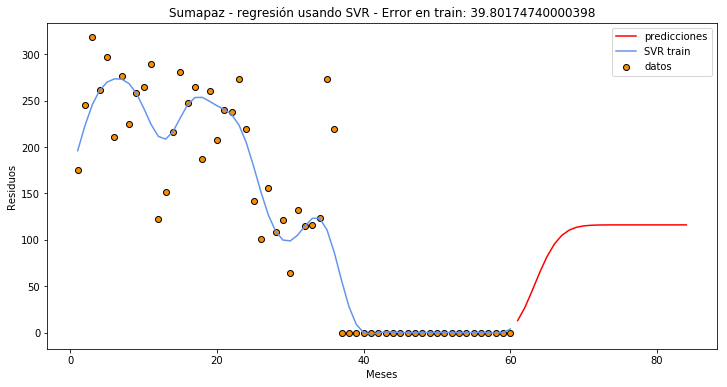

Score entrenamiento R^2:  0.24858150609710705
Support vector (Coeficiente): 0.600


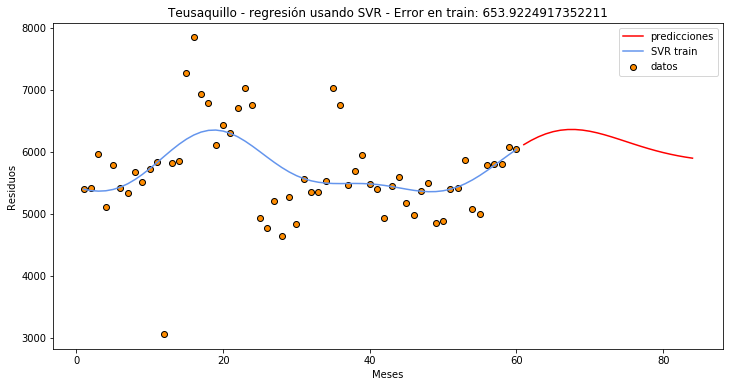

Score entrenamiento R^2:  0.4834808126989467
Support vector (Coeficiente): 0.600


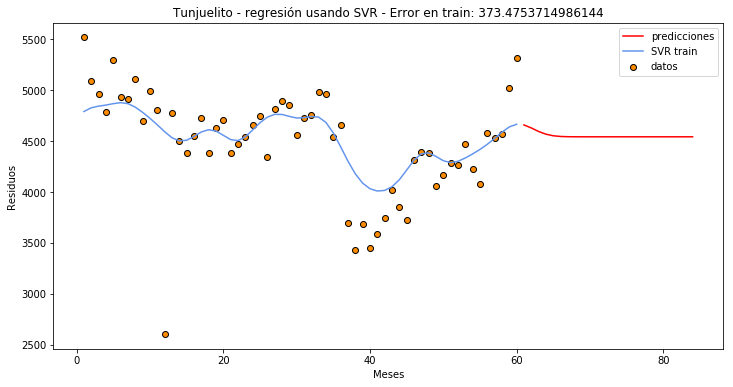

Score entrenamiento R^2:  0.1734099080119863
Support vector (Coeficiente): 0.600


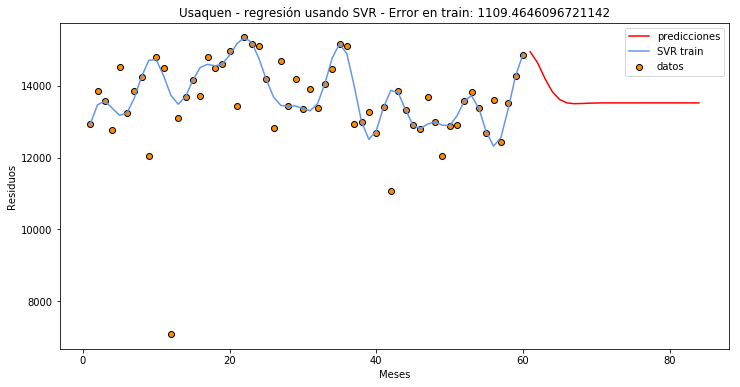

Score entrenamiento R^2:  0.0896488715602567
Support vector (Coeficiente): 0.600


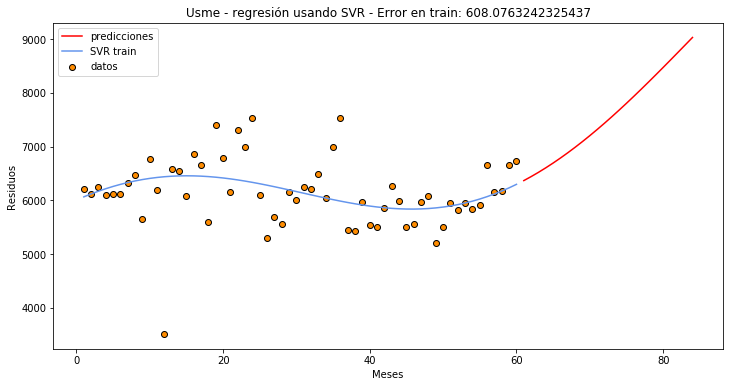

In [6]:
prediciones = func_tools.entrenar_modelo(dic_series, series_list, parametros)   

### Caracterización

In [100]:
residuos_estrato = func_tools.estratificacion_residuos(parametros[0], estratificacion, caracterizacion, prediciones, data_csv_zona, data_csv_localidad)

### Visualización por estratos

Cuál localidad (ID) quiere visualizar? = 4
Cuál predicción (mes) quiere visualizar? = 5


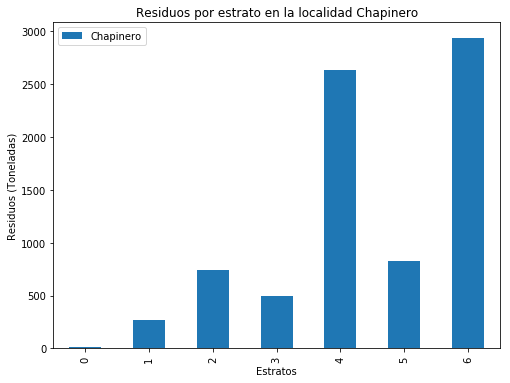

In [209]:
func_tools.plot_residuos_estrato(estratificacion,residuos_estrato, parametros)

### Visualización por tipo de residuo

Cuál localidad (ID) quiere visualizar? = 4
Cuál predicción (mes) quiere visualizar? = 4
Cuál es el estrato (1-6) que quiere visualizar? = 6


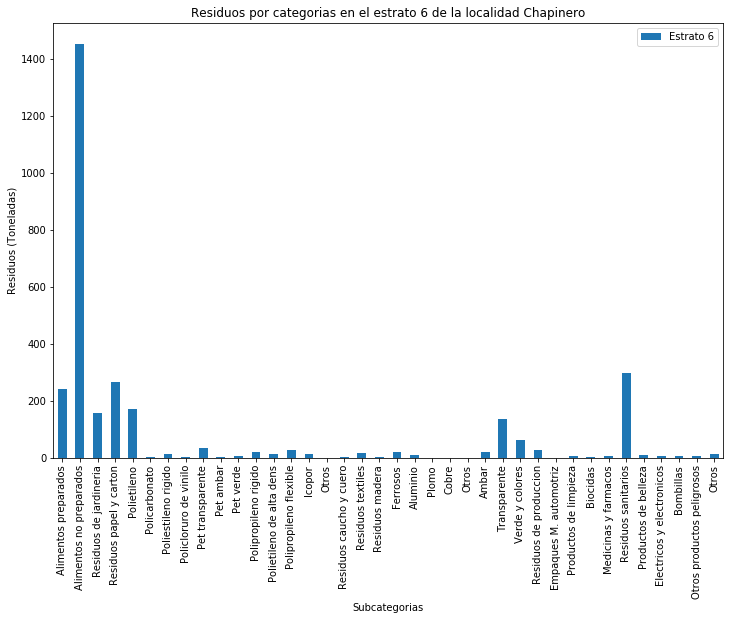

In [267]:
func_tools.plot_caracterizacion(estratificacion, caracterizacion, residuos_estrato, parametros)